<br><h1> <img src="https://serea2017.uniandes.edu.co/images/Logo.png" height="120" width="400" align="Center" /><br>
 
## MIIA-4203 MODELOS AVANZADOS PARA ANÁLISIS DE DATOS II
 


 # Introducción al aprendizaje computacional
 
## Actividad 1 -- 19 Agosto 2020
 


 ### Profesor: Camilo Franco (c.franco31@uniandes.edu.co)
 


                          Nombres                  Usuario            Código

            - Camilo Andrés Angarita Ortiz        ca.angarita967  201111642      

            - Javier Alfonso Lesmes Patiño        ja.lesmes21     200820243

            - Gerson Arturo Guerrero              ga.guerrero     201823464 

            - Elquin Huertas Ramírez               e.huertas      201920061
 
En esta actividad vamos a estudiar una primera aproximación a los modelos de aprendizaje computacional, utilizando como base un problema de clasifiación y el modelo de clasificación logístico.

## 1. Aprendizaje computacional

El aprendizaje computacional o **Machine Learning** (ML), utiliza algoritmos con parámetros libres que se puedan ajustar de manera automática, con el objetivo de mejorar el desempeño de los modelos a partir de la información disponible.

El aprendizaje computacional se circunscribe en el campo de la Inteligencia Computacional, o lo que se conoce como Inteligencia Artificial, mediante la búsqueda de patrones a partir de los *Datos*. Entonces, los algoritmos desarrollados dentro del Machine Learning (ML a partir de ahora) se pueden entender como los bloques fundacionales que permiten aprender computacionalmente a partir de los datos. De esta manera, generalizando los datos en lugar de solo almacenarlos y devolver busquedas específicas, como en los sistemas relacionales de bases de datos.


### Tipos de aprendizaje

Los tipos de problemas sobre los que se trabaja en ML se pueden entender como de tipo **supervisado**, **no supervisado**, y **semi-supervisado**. 

**Aprendizaje supervisado**

El aprendizaje supervisado se refiere a modelos, o conjuntos de algoritmos, que aproximan o estiman una función $f(x)$ que representa la relación entre la variable dependiente $Y$ (etiqueta o valor objetivo) y el conjunto de variables independientes $X$. Por ello a los algoritmos de tipo supervisado se les asocia usualmente con modelos predictivos, donde dado un conjunto de datos $X$, se puede predecir un nuevo valor de la variable dependiente $Y$. 

De acuerdo con el tipo de valores en $Y$, se pueden definir dos tipos principales de problemas y algoritmos para analizar los datos:

- Problemas de clasificación

Siempre que la variable $Y$ se refiera a un grupo de categorías (valores sin ningún orden en particular), como por ejemplo bueno/malo, pequeño/grande, la tarea de predecir $Y$ puede ser considerada como un problema de clasificación. En este sentido, las variables de salida se conocen como etiquetas o categorías.

- Problemas de regresión

Un problema de regresión consiste en estimar y/o predecir una variable dependiente (o valor objetivo) $Y$ con valores continuos. Por ejemplo, predecir el precio de una vivienda, de acciones, alimentos, etc. 

**Aprendizaje no-supervisado**
    
El aprendizaje no-supervisado considera problemas donde la variable dependiente $Y$, o las etiquetas para el conjunto de datos, no está disponible. Es decir, cuando $Y$ no está contenida en el conjunto de datos. Entonces, en lugar de estimar o predecir una variable, un algoritmo no-supervisado utiliza técnicas sobre el conjunto de datos de entrada $X$ para detectar patrones, encontrar reglas, o resumir y agrupar los datos. Usualmente, los algoritmos no-supervisados son utilizados para el análisis descriptivo y la modelación, donde se necesita una primera aproximación a los datos, desarrollar una intuición y extraer nuevo conocmiento que es desconocido para el analista y/o experto. 

En el aprendizaje no-supervisado, se tienen dos tareas principales, la reducción de dimensionalidad y el análisis de clustering.

- Reducción de dimensionalidad 

La reducción de dimensionalidad busca encontrar la estructura subyacente de los datos, reduciendo la cantidad de información disponible en el conjunto de datos $X$. Por ejemlo, es muy conocido el análisis de componentes principales. 

- Clustering 

El análisis de clustering consiste en agrupar un conjunto de datos $X$ de manera que cada grupo contenga observaciones más similares entre sí que con las observaciones de otros grupos. Estos grupos son denominados *clusters*. Es una técnica bastante común para la exploración de los datos y su análisis. 


#### Otros tipos de aprendizaje

Más allá de estos dos tipos de aprendizaje presentados anteriormente, existen otros tipos que son bastante útiles dependiendo de la naturaleza del problema. Por ejemplo, el **aprendizaje semi-supervisado** (https://medium.com/inside-machine-learning/placeholder-3557ebb3d470) o el **aprendizaje por refuerzo** (https://medium.com/machine-learning-for-humans/reinforcement-learning-6eacf258b265) 

## 2. Problema de clasificación: riesgo de default

### 2.1 Datos

Como hemos visto, una tarea muy usual dentro del ML es la de la clasificación. Pero antes, vamos a importar las bibliotecas que vamos a usar en este cuaderno.

In [2]:
# Algunos paquetes iniciales que vamos a utilizar
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV


https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [3]:
data = pd.read_csv("germancredit.csv")

In [14]:
data.head()

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [4]:
data.dtypes

Default             int64
checkingstatus1    object
duration            int64
history            object
purpose            object
amount              int64
savings            object
employ             object
installment         int64
status             object
others             object
residence           int64
property           object
age                 int64
otherplans         object
housing            object
cards               int64
job                object
liable              int64
tele               object
foreign            object
dtype: object

In [5]:
data.Default.value_counts()

0    700
1    300
Name: Default, dtype: int64

La clase positiva (default=1) tiene menos casos.  Además, es 5 veces más costoso clasificar a un usuario como bueno (Defualt=0) cuando es malo (Default=1), que clasificarlo como malo cuando es bueno.

In [6]:
data.foreign.value_counts()

A201    963
A202     37
Name: foreign, dtype: int64

Vemos que la mayoría de clientes de la base de datos son extranjeros.

## 2.2 Codificacion de variables categoricas

In [4]:
credit_1 = data.copy()
credit_1 = pd.get_dummies(credit_1, columns=['checkingstatus1','history','purpose','savings',
                                   'employ','status','others','property','otherplans','housing','job','tele', 
                                   'foreign'], prefix = ['checkingstatus1','history','purpose','savings',
                                   'employ','status','others','property','otherplans','housing','job','tele', 
                                   'foreign'])

print(credit_1.head())

   Default  duration  amount  installment  residence  age  cards  liable  \
0        0         6    1169            4          4   67      2       1   
1        1        48    5951            2          2   22      1       1   
2        0        12    2096            2          3   49      1       2   
3        0        42    7882            2          4   45      1       2   
4        1        24    4870            3          4   53      2       2   

   checkingstatus1_A11  checkingstatus1_A12  ...  housing_A152  housing_A153  \
0                    1                    0  ...             1             0   
1                    0                    1  ...             1             0   
2                    0                    0  ...             1             0   
3                    1                    0  ...             0             1   
4                    1                    0  ...             0             1   

   job_A171  job_A172  job_A173  job_A174  tele_A191  tele_A19

In [7]:
X = credit_1.iloc[:, 1:62]#[['duration','amount','installment','residence','age','cards','liable']]
Y = credit_1.iloc[:, 0]
X.shape

(1000, 61)

### 3. Regresión logística

Podemos estudiar un problema de clasificación desde una perspectiva probabilística, examinando una situación donde la variable respuesta ($Y_i$) consiste de dos categorías ($\{0,1\}$). La *regresión logística* estima la probabilidad de que una observación pertenezca a una de las dos categorías.

Entonces se modela la función de probabilidad $p(Y_i=1)$ de tal manera que tome un valor entre 0 y 1. La función de regresión logística consiste en la función *sigmoide* ($\sigma(\cdot)$) $$ p(Y_i)=p(Y_i=1)=\frac{e^{\beta_0 + \beta_1X_{1} + ... + \beta_k X_{k}}}{1+e^{\beta_0 + \beta_1X_{1} + ... + \beta_k X_{k}}}=\frac{e^{Z_i}}{1+e^{Z_i}}=\sigma(Z_i)$$
donde se tiene que 
$$log\frac{p(Y_i)}{1-p(Y_i)}=\beta_0 + \beta_1X_{1} + ... + \beta_k X_{k}.  $$


Por lo tanto, manteniendo todo lo demás constante, se puede estimar el cambio que una unidad extra en $X_1$ tiene sobre  el chance (o el *log-odds*) $log\frac{p(Y_i)}{1-p(Y_i)}$. Esta estimación está dada por $\hat \beta_1$. 


Los coeficientes del modelo se pueden estimar por el método de máxima verosimilitud, buscando iterativamente estimadores que maximicen la función de verosimilitud: $$ F_{\mathbf{\beta}}=\prod_{i:Y_i=1} p(Y_i)\prod_{i':Y_{i'}=0}(1-p(Y_{i'})). $$


Finalmente, la extensión del modelo logístico para múltiples clases o categorías ($C$) se hace calculando la probabilidad de una categoría ($C_i$) frente al resto y utilizando lo que se conoce como una función *softmax*: 
$$ \sigma (Z_i )={\frac {e^{Z_{i}}}{\sum _{j=1}^{|C|}e^{Z_{j}}}}{\text{ para }}i=1,\dotsc ,|C|$$


Miremos un ejemplo con nuestros datos sobre el comportamiento de los clientes del banco. Primero descargamos los paquetes que vamos a utilizar:

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

Por defecto, la funcion `LogisticRegression()` encuentra una solución mediante el algoritmo de Broyden–Fletcher–Goldfarb–Shanno (BFGS):  https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm

In [8]:
log = LogisticRegression(max_iter=100)
log.fit(X, Y)
y_pred_log = log.predict(X)
log_coef = log.coef_
print(log_coef)

[[ 2.53490795e-02  8.32828686e-05  2.22994872e-01 -7.13817545e-02
  -2.22146556e-02  7.39686688e-02 -7.03973050e-02  7.03443103e-01
   2.88496336e-01 -1.22332415e-01 -1.09933253e+00  2.88107441e-01
   2.65242607e-01 -2.08780273e-01  8.05932574e-03 -5.82354611e-01
   5.51407204e-01 -5.29589072e-01 -3.58563564e-02 -1.38025358e-01
  -3.87137718e-01  1.13642985e-02  7.80704681e-02  2.10294400e-01
  -4.70498965e-02  5.67965193e-02  4.24302065e-01  7.78439695e-02
  -9.25894173e-02 -1.83170264e-01 -4.56111864e-01  5.11704084e-02
   1.64827883e-01  2.68686548e-02 -4.49632259e-01 -2.29601981e-02
   1.52344342e-01  8.95904419e-02 -3.78968299e-01 -9.26919962e-02
  -4.47814676e-02  9.41959683e-02 -2.79140011e-01 -3.74201999e-01
  -6.28300432e-02  2.92406727e-02  1.78065859e-01  2.10800120e-01
   9.93048498e-02 -5.39830481e-01  7.49756220e-02 -3.19945599e-01
   1.52444666e-02 -1.82715024e-02 -7.36578039e-02 -6.29687773e-02
  -7.48274270e-02  1.83586723e-02 -2.48084183e-01 -1.17063934e-03
  -2.28554

/Users/gerson.guerrero/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
log.n_iter_

array([100], dtype=int32)

### Ejercicio 3.1

Ajuste las opciones de la funcion `LogisticRegression`para conseguir que la solucion converja. Puede examinar la documentación de Python: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

-- -----------------

Se realiza un cambio en el método de convergencia a _newton-cg_ (Newton Conjugate Gradient).

In [21]:
log = LogisticRegression(solver="newton-cg", max_iter=100) 
log.fit(X, Y)
y_pred_log = log.predict(X)
log_coef = log.coef_
print(log_coef)

[[ 2.77541715e-02  1.21598920e-04  3.19443685e-01  6.65859716e-03
  -1.42821979e-02  2.45671110e-01  2.33713161e-01  7.38105633e-01
   3.67668695e-01 -1.85310100e-01 -9.20534543e-01  4.90882969e-01
   5.96389805e-01 -1.91718234e-02 -2.45440543e-01 -8.22730724e-01
   7.20231004e-01 -8.18934978e-01 -4.58246344e-01 -2.60422884e-02
  -1.40592421e-01  1.51191591e-01  4.17429792e-01  6.88360305e-01
  -5.65700017e-01  3.22330412e-02  5.63734978e-01  2.26835349e-01
   1.48066454e-01 -5.83139751e-01 -3.55567346e-01  2.13897540e-01
   2.18293361e-01  9.53667826e-02 -5.18386687e-01 -9.24131201e-03
   3.36140234e-01  1.02992922e-01 -4.15275975e-01 -2.39274963e-02
   1.73625908e-01  5.06717403e-01 -6.80413626e-01 -2.81545269e-01
  -1.29754302e-02 -8.38730534e-02  3.78323437e-01  2.38151205e-01
   1.36697396e-01 -3.74918917e-01  3.31401098e-01 -9.09808681e-02
  -2.40490546e-01 -2.53674847e-01  8.80771130e-02  1.17421938e-01
   4.81054808e-02  1.45226598e-01 -1.45296914e-01  5.83463476e-01
  -5.83533

### Pregunta 3.2 

Cuántas iteraciones necesitó?

-------------

Con el método de _newton-cg_, la regresión converge con 60 iteraciones

In [22]:
log.n_iter_

array([60], dtype=int32)

## 4. Construccion de modelos predictivos

Partimos los datos de manera aleatoria en un conjunto de entrenamiento y otro de prueba. De esta manera, estimamos los coeficientes sobre los datos de entrenamiento, y ese mismo modelo lo probamos sobre los datos de prueba con el fin de controlar que el modelo esté generalizando bien y no se sobreajuste a los datos.

A continuación ejecutamos el codigo para obtener una partición con el 40% de los datos en el conjunto de prueba. Nótese que por defecto la funcion `train_test_split` sigue una partición estratificada, es decir, mantiene la distribución inicial de las clases en ambos conjuntos de entrenamiento y prueba:


In [24]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=42)
print("Tamaño de CE, CP: ", y_train.shape, y_test.shape)
print("Observaciones de la clase positiva en entrenamiento: " +str(sum(y_train)) +" y en prueba: " +str(sum(y_test)))

Tamaño de CE, CP:  (600,) (400,)
Observaciones de la clase positiva en entrenamiento: 182 y en prueba: 118


Lo podemos verificar:

In [25]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=42, stratify=Y)
print("Tamaño de CE, CP: ", y_train.shape, y_test.shape)
print("Observaciones de la clase positiva en entrenamiento: " +str(sum(y_train)) +" y en prueba: " +str(sum(y_test)))

Tamaño de CE, CP:  (600,) (400,)
Observaciones de la clase positiva en entrenamiento: 180 y en prueba: 120


A continuación ajustamos el modelo logístico y lo probamos:

In [26]:
logT = LogisticRegression(penalty='none', max_iter=1500)
logT.fit(X_train, y_train)
y_tr = logT.predict(X_train)
y_pred = logT.predict(X_test)

Con menos datos para entrenar probablemente el algoritmo necesite más iteraciones:

In [33]:
logT.n_iter_

array([375], dtype=int32)

Examinemos los coeficientes del modelo y su desviación con respecto a la estimación anterior (que utilizaba todos los datos de la muestra).

In [27]:
logT_coef = logT.coef_
print(logT_coef)

[[ 2.10773005e-02  1.02771308e-04  3.15481725e-01  1.79826321e-02
  -8.12310264e-03  1.50526022e-01  7.30169441e-02  5.64754573e-01
   1.26136252e-01 -2.83119926e-01 -9.67068789e-01  3.66444227e-01
   2.94985173e-01 -1.43018240e-01  1.13700582e-01 -1.19140963e+00
   2.21176769e-01 -8.44727770e-01 -2.85274400e-01 -3.87568911e-01
  -2.91246871e-01 -3.87054885e-02  1.53002248e-01  7.29406448e-01
  -1.80227159e-03  1.86442359e-01  5.97861031e-01  2.17654985e-01
  -2.48653168e-01 -7.34607230e-01 -3.91553507e-01  5.02533398e-01
   1.34453717e-01 -1.10384580e-02 -1.11518636e+00 -7.00601867e-02
   3.00665101e-01 -1.73532620e-01 -5.70567006e-01 -1.15863364e-01
  -1.96750670e-01  2.24357306e-01 -5.86904525e-01 -4.77452082e-01
  -5.29445374e-02 -1.08602042e-01  7.97007722e-02  1.03176798e-01
   1.17743856e-01 -7.80218543e-01  4.20012509e-01 -4.49166502e-01
  -5.30143896e-01 -3.18330326e-02 -1.00369546e-01 -8.30431900e-02
  -3.44052120e-01 -1.36532853e-01 -4.22765036e-01  2.48149325e-01
  -8.07447

In [28]:
print(log_coef-logT_coef)

[[ 6.67687101e-03  1.88276115e-05  3.96195954e-03 -1.13240350e-02
  -6.15909523e-03  9.51450876e-02  1.60696217e-01  1.73351059e-01
   2.41532443e-01  9.78098254e-02  4.65342458e-02  1.24438742e-01
   3.01404632e-01  1.23846416e-01 -3.59141125e-01  3.68678908e-01
   4.99054235e-01  2.57927923e-02 -1.72971944e-01  3.61526623e-01
   1.50654449e-01  1.89897080e-01  2.64427544e-01 -4.10461425e-02
  -5.63897745e-01 -1.54209317e-01 -3.41260525e-02  9.18036403e-03
   3.96719622e-01  1.51467479e-01  3.59861607e-02 -2.88635858e-01
   8.38396441e-02  1.06405241e-01  5.96799672e-01  6.08188747e-02
   3.54751329e-02  2.76525542e-01  1.55291031e-01  9.19358680e-02
   3.70376578e-01  2.82360097e-01 -9.35091012e-02  1.95906813e-01
   3.99691072e-02  2.47289886e-02  2.98622665e-01  1.34974408e-01
   1.89535397e-02  4.05299626e-01 -8.86114101e-02  3.58185634e-01
   2.89653350e-01 -2.21841814e-01  1.88446659e-01  2.00465128e-01
   3.92157601e-01  2.81759451e-01  2.77468122e-01  3.35314151e-01
   2.23913

### Ejercicio 4.1

Implemente un proceso de validación cruzada cambiando la semilla de las particiones de train (CE) y test (CP). Estimae la varianza de los estimadores y concluya si su *mejor* modelo es estable entre distintas particiones.

In [10]:
coef_cv=[]
random_states = [43, 12, 56, 32, 71, 73, 47, 18, 24, 19]

for seed in random_states:
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=seed)
    log_cv = LogisticRegressionCV(max_iter=3500, cv=5, random_state=seed)#, solver='newton-cg')
    log_cv.fit(X_train, y_train)
    lista=log_cv.coef_
    flattened = [val for sublist in lista for val in sublist]
    coef_cv.append(flattened)

Se convierten los diferentes coeficientes generados por cada iteración en un dataframe

In [11]:
data_coef = pd.DataFrame(coef_cv)
data_coef.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
3,0.030838,0.000089,0.193961,-0.025652,-0.029435,0.083539,-0.002745,0.370676,0.215577,-0.058462,...,-0.237188,0.157446,-0.000176,-0.052285,-0.041904,0.047121,0.076275,-0.123519,0.054529,-0.101773
2,0.028889,0.000047,0.150371,-0.007689,-0.009195,0.012114,0.024949,0.324972,0.231364,-0.005570,...,-0.203564,0.017305,0.012014,-0.058645,0.002519,-0.007050,0.016823,-0.067985,0.024300,-0.075463
5,0.028211,0.000039,0.074683,0.053966,-0.027575,0.014395,0.002814,0.127459,0.058789,-0.014969,...,-0.015085,-0.008194,-0.004336,0.007865,-0.005745,-0.006137,0.022769,-0.031122,0.000734,-0.009087
1,0.027416,0.000084,0.256634,0.014117,-0.006089,-0.105665,0.103281,0.658725,0.282622,-0.279226,...,-0.522282,0.049590,0.160462,-0.136283,-0.014648,-0.220108,0.180473,-0.391051,0.105148,-0.315726
6,0.024721,0.000133,0.316414,0.090735,-0.005285,0.037841,0.081012,0.544477,0.102231,-0.121925,...,-0.255467,-0.161235,0.049767,-0.181790,-0.257493,0.120206,0.055004,-0.324314,0.258504,-0.527813
7,0.022686,0.000066,0.237550,0.038507,-0.010659,-0.078621,0.059714,0.491019,0.232403,-0.091901,...,-0.411805,0.026960,-0.017696,-0.083584,-0.006142,-0.041670,0.060360,-0.209452,0.237235,-0.386327
8,0.035545,0.000035,0.222275,0.000027,-0.002737,0.011826,0.206038,0.754294,0.035454,-0.074459,...,-0.394834,0.121537,-0.156455,0.110553,-0.216781,0.084954,-0.126215,-0.051515,0.168346,-0.346076
4,0.037144,0.000041,0.197983,-0.050814,-0.020472,0.053905,0.209541,0.652470,0.390548,-0.164432,...,-0.243660,-0.107634,-0.121575,-0.035868,-0.005736,-0.011278,0.044917,-0.219374,0.129971,-0.304428
0,0.037761,0.000084,0.299779,0.036120,-0.014560,0.020965,0.395484,0.680059,0.113037,-0.125455,...,-0.184593,-0.221245,-0.148140,-0.204136,-0.180788,0.146436,-0.078905,-0.307723,0.314323,-0.700951
9,0.036918,0.000052,0.164685,-0.065809,-0.013694,0.140370,-0.093081,0.662591,0.172303,0.013673,...,-0.207115,0.069456,-0.039019,-0.055415,0.016372,-0.105249,-0.010816,-0.172495,0.174308,-0.357619


Se realiza el calculo de la varianza para determinar si efectivamente el modelo es estable ante distinos sets de entrenamiento

In [12]:
data_coef.var(axis=0)

0     3.030970e-05
1     9.467184e-10
2     5.196605e-03
3     2.340489e-03
4     8.493893e-05
          ...     
56    1.186681e-02
57    7.150703e-03
58    1.528840e-02
59    1.075717e-02
60    4.428833e-02
Length: 61, dtype: float64

In [13]:
data_coef.var(axis=0).mean()

0.01932869977404604

Utilizando Folds y modificando el solver al planteado inicialmente y utilizar menos iteraciones

In [14]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import accuracy_score

#Semillas controladas
random_states = [43, 12, 56, 32, 71, 73, 47, 18, 24, 19]
i=0
coef = [];flattened=[]
for seed in random_states:
    log = LogisticRegression(solver="newton-cg", max_iter=100)
    kf = KFold(n_splits=5, random_state=seed, shuffle=True)

    for train_index, test_index in kf.split(credit_1):
        X_train = credit_1.iloc[train_index].iloc[:,1:62]
        X_test = credit_1.iloc[test_index].iloc[:,1:62]
        y_train = credit_1.iloc[train_index]['Default']
        y_test = credit_1.iloc[test_index]['Default']

        log.fit(X_train, y_train) #Training the model
        flattened.append(log_cv.coef_)
        flattened = [val for sublist in lista for val in sublist]
        coef.append(flattened)


In [15]:
data_coef = pd.DataFrame(coef_cv)
data_coef.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
4,0.037144,0.000041,0.197983,-0.050814,-0.020472,0.053905,0.209541,0.652470,0.390548,-0.164432,...,-0.243660,-0.107634,-0.121575,-0.035868,-0.005736,-0.011278,0.044917,-0.219374,0.129971,-0.304428
2,0.028889,0.000047,0.150371,-0.007689,-0.009195,0.012114,0.024949,0.324972,0.231364,-0.005570,...,-0.203564,0.017305,0.012014,-0.058645,0.002519,-0.007050,0.016823,-0.067985,0.024300,-0.075463
1,0.027416,0.000084,0.256634,0.014117,-0.006089,-0.105665,0.103281,0.658725,0.282622,-0.279226,...,-0.522282,0.049590,0.160462,-0.136283,-0.014648,-0.220108,0.180473,-0.391051,0.105148,-0.315726
3,0.030838,0.000089,0.193961,-0.025652,-0.029435,0.083539,-0.002745,0.370676,0.215577,-0.058462,...,-0.237188,0.157446,-0.000176,-0.052285,-0.041904,0.047121,0.076275,-0.123519,0.054529,-0.101773
6,0.024721,0.000133,0.316414,0.090735,-0.005285,0.037841,0.081012,0.544477,0.102231,-0.121925,...,-0.255467,-0.161235,0.049767,-0.181790,-0.257493,0.120206,0.055004,-0.324314,0.258504,-0.527813
0,0.037761,0.000084,0.299779,0.036120,-0.014560,0.020965,0.395484,0.680059,0.113037,-0.125455,...,-0.184593,-0.221245,-0.148140,-0.204136,-0.180788,0.146436,-0.078905,-0.307723,0.314323,-0.700951
7,0.022686,0.000066,0.237550,0.038507,-0.010659,-0.078621,0.059714,0.491019,0.232403,-0.091901,...,-0.411805,0.026960,-0.017696,-0.083584,-0.006142,-0.041670,0.060360,-0.209452,0.237235,-0.386327
5,0.028211,0.000039,0.074683,0.053966,-0.027575,0.014395,0.002814,0.127459,0.058789,-0.014969,...,-0.015085,-0.008194,-0.004336,0.007865,-0.005745,-0.006137,0.022769,-0.031122,0.000734,-0.009087
9,0.036918,0.000052,0.164685,-0.065809,-0.013694,0.140370,-0.093081,0.662591,0.172303,0.013673,...,-0.207115,0.069456,-0.039019,-0.055415,0.016372,-0.105249,-0.010816,-0.172495,0.174308,-0.357619
8,0.035545,0.000035,0.222275,0.000027,-0.002737,0.011826,0.206038,0.754294,0.035454,-0.074459,...,-0.394834,0.121537,-0.156455,0.110553,-0.216781,0.084954,-0.126215,-0.051515,0.168346,-0.346076


In [16]:
data_coef.var(axis=0)

0     3.030970e-05
1     9.467184e-10
2     5.196605e-03
3     2.340489e-03
4     8.493893e-05
          ...     
56    1.186681e-02
57    7.150703e-03
58    1.528840e-02
59    1.075717e-02
60    4.428833e-02
Length: 61, dtype: float64

In [17]:
data_coef.var(axis=0).mean()

0.01932869977404604

## 5. Evaluacion de los modelos
Hasta ahora hemos estimado los parámetros del modelo logístico. Pero no hemos examinado si la solución es satisfactoria. A continuación examinemos el desempeño de los modelos a partir de su matriz de confusión: 

In [96]:
from sklearn.metrics import confusion_matrix

# Calculamos la matriz de confusión para la prediccion
cm_log = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print(cm_log)

[[242  38]
 [ 58  62]]


Podemos mejorar esta visualización, añadiendo etiquetas para lo que es predicción y lo que es observado en la muestra:

In [64]:
def plot_confusion_matrix(cm, title='Matriz de confusión', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('Etiqueta verdadera')
    plt.xlabel('Etiqueta estimada')

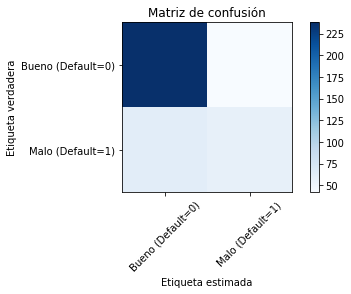

In [65]:
labels=['Bueno (Default=0)' ,'Malo (Default=1)']

plt.figure()
plot_confusion_matrix(cm_log)

Podemos resumir estos resultados, por ejemplo mediante la métrica de *exactitud* o *accuracy*, la cual mide la proporción de aciertos sobre el total de casos.

Para entrenamiento:

In [97]:
float((y_tr == y_train).mean())

0.785

Para predicción:

In [98]:
float((y_pred == y_test).mean())

0.76

### Ejercicio 5.1

Calcule una métrica de desempeño que tome en cuenta el coste de errar, donde el coste de predecir que un mal cliente es bueno es 5 veces más alto que el de confundir un buen cliente con uno malo.

-----------

Calculamos la matriz de confusión para la prediccion en entrenamiento

In [113]:
log = LogisticRegression(solver="newton-cg", max_iter=100)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=42, stratify=Y)
log.fit(X_train, y_train)
y_tr = log.predict(X_train)
y_pred = log.predict(X_test)

In [114]:
VP = cm_log_tr[0][0];FN=cm_log_tr[0][1]
VN = cm_log_tr[1][1];FP=cm_log_tr[1][0]

Utilizando la métrica de la precisión el modelo actual nos arroja una precisión de:

In [115]:
print(f"Precision = {(VP+VN)/(VP+VN+FN+FP)}")

Precision = 0.76


Sin embargo, dada la importancia que tiene no generar falsos positivos (predecir que es No es default dado que si lo es), nos interesa una métrica que nos relacione los Falos Positivos o los Verdaderos Negativos. En ese caso, si calculamos la especificidad, que es un score que nos resalta la relación de los Verdaderos Negativos nos arroja _*0.51*_ lo cual es aleatorio

In [116]:
print(f"Especificidad = {VN/(VN+FP)}")

Especificidad = 0.5166666666666667


Si le agregamos el componente x5 directamente a la precisión, para desbalancear la ecuación e indicar que los _FN_ son cinco veces más relevantes nos entregaría un valor aproximado al anterior

In [117]:

m_tr=(VP+VN)/(VP+VN+FN+5*FP)

print(f"La métrica calculada añadiendole un peso x5 sobre los falsos positivos sería: {m_tr}")

La métrica calculada añadiendole un peso x5 sobre los falsos positivos sería: 0.4810126582278481


Se elige alta Especificidad:  si se desea identificar los verdaderos negativos, o lo que es igual cuando no desea falsos positivos. Realizamos un pequeño ajuste sobre los parámetros del modelo para tener una mejor especificidad. En el parámetro _class_weight_ se especifica un _dict_ con los pesos que se desean sobre los valores del _target_ para balancear el modelo

In [119]:
log = LogisticRegression(solver="newton-cg", max_iter=100, class_weight={1:0.8,0:0.2})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=42, stratify=Y)
log.fit(X_train, y_train)
y_tr = log.predict(X_train)
y_pred = log.predict(X_test)
cm_log_tr = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
VP = cm_log_tr[0][0];FN=cm_log_tr[0][1]
VN = cm_log_tr[1][1];FP=cm_log_tr[1][0]
print(f"Precision = {(VP+VN)/(VP+VN+FN+FP)}")
print(f"Especificidad = {VN/(VN+FP)}")

Precision = 0.66
Especificidad = 0.85


In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["default=0","default=1"]))

              precision    recall  f1-score   support

   default=0       0.90      0.58      0.70       280
   default=1       0.46      0.85      0.60       120

    accuracy                           0.66       400
   macro avg       0.68      0.71      0.65       400
weighted avg       0.77      0.66      0.67       400



### Justicia algorítmica

Veamos cómo se comporta el modelo de acuerdo con el origen (extranjero o local) del cliente. Por ejemplo, fijémonos en el balance inicial de los datos de la muestra:

In [121]:
credit_2 = credit_1.copy()
credit_3 = credit_2.loc[credit_2['foreign_A201'] == 1]
X3 = credit_3.iloc[:, 1:62]
Y3 = credit_3.iloc[:, 0]

credit_4 = credit_2.loc[credit_2['foreign_A201'] == 0]
X4 = credit_4.iloc[:, 1:62]
Y4 = credit_4.iloc[:, 0]

In [122]:
print("El numero de clientes extranjeros de la muestra: " +str(X3.shape[0]) +" y los locales: " +str(X4.shape[0]))

El numero de clientes extranjeros de la muestra: 963 y los locales: 37


## Pregunta 5.2

De los clientes locales cuantos han tenido Default?

In [123]:
cross=pd.crosstab(credit_2['foreign_A201'],Y)
cross

Default,0,1
foreign_A201,,
0,33,4
1,667,296


In [149]:
N_Local_Default = credit_1.loc[(credit_1['foreign_A201'] ==0) & (credit_1['Default'] == 1)].shape[0]
print(f"Clientes locales con default: {N_Local_Default}")

Clientes locales con default: 4


------

Vemos que ya hay un sesgo en los datos de entrenamiento. Por lo tanto, podemos esperar que esto se vea reflejado en nuestro modelo:

In [150]:
y_pred_f = logT.predict(X3)
y_pred_l = logT.predict(X4)

Veamos otra manera de visualizar la matriz de confusion:

Extranjeros:


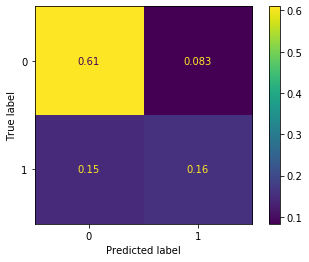

Locales:


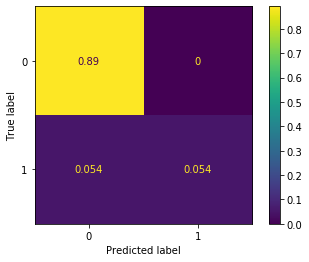

In [151]:
from sklearn.metrics import plot_confusion_matrix

print("Extranjeros:")
plot_confusion_matrix(logT, X3, Y3, normalize='all')  
plt.show() 

print("Locales:")
plot_confusion_matrix(logT, X4, Y4, normalize='all')  
plt.show()

Y las métricas de exactitud:

In [152]:
print("La exactitud para el usuario extranjero:", float((y_pred_f == Y3).mean()))
print("La exactitud para el usuario local:", float((y_pred_l == Y4).mean()))

La exactitud para el usuario extranjero: 0.7684319833852544
La exactitud para el usuario local: 0.9459459459459459


### Ejercicio 5.3

Proponga una modelo de clasificación que detecte clientes con un alto riesgo de Default, teniendo en cuenta el costo de clasificar a un cliente erroneamente  junto con la "equidad algoritmica".

-------

Inicialmente realizamos un análisis para determinar si podemos descartar la variable que indica la nacionalidad, dado que se encuentra que el desbalance es muy grande y correríamos el riesgo de sobre ajustar el modelo por la generación de variables sinteticas

In [196]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.447909
         Iterations 21
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      951
Method:                           MLE   Df Model:                           48
Date:                Mon, 17 Aug 2020   Pseudo R-squ.:                  0.2668
Time:                        15:48:06   Log-Likelihood:                -447.91
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 5.755e-43
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
duration                0.0279      0.009      2.997      0.003       0.010       0.046
a

Encontramos que el campo foreign (A201 y A202) no son significativos por lo tanto no aporta mayor información al modelo.

In [125]:
df = credit_1

In [126]:
df = df.drop(['foreign_A201', 'foreign_A202'], axis=1)

In [131]:
log = LogisticRegression(solver="newton-cg", max_iter=100, class_weight = {1:0.8,0:0.2})
X = df.iloc[:, 1:60]
Y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=42, stratify=Y)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["default=0","default=1"]))

              precision    recall  f1-score   support

   default=0       0.90      0.57      0.70       280
   default=1       0.46      0.85      0.60       120

    accuracy                           0.66       400
   macro avg       0.68      0.71      0.65       400
weighted avg       0.77      0.66      0.67       400



Volvemos a generar los datasets anteriores, para quitarles las columnas de _foreign_ y posterior determinar los resultados del modelo y comparar si se reduce el GAP entre las predicciones sobre extranjeros y locales

In [136]:
credit_2_ = credit_1.copy()
credit_3_ = credit_2_.loc[credit_2_['foreign_A201'] == 1]
X3_ = credit_3_.iloc[:, 1:62]
Y3_ = credit_3_.iloc[:, 0]

credit_4_ = credit_2_.loc[credit_2_['foreign_A201'] == 0]
X4_ = credit_4_.iloc[:, 1:62]
Y4_ = credit_4_.iloc[:, 0]

In [137]:
X3_ = X3_.drop(['foreign_A201', 'foreign_A202'], axis=1)

In [138]:
X4_ = X4_.drop(['foreign_A201', 'foreign_A202'], axis=1)

In [140]:
y_pred_f = log.predict(X3_)
y_pred_l = log.predict(X4_)

In [143]:
print("La exactitud para el usuario extranjero:", float((y_pred_f == Y3_).mean()))
print("La exactitud para el usuario local:", float((y_pred_l == Y4_).mean()))

La exactitud para el usuario extranjero: 0.6812045690550363
La exactitud para el usuario local: 0.7027027027027027


Extranjeros:


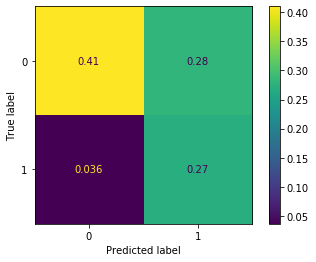

Locales:


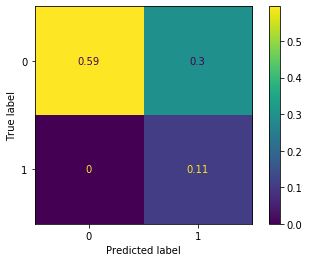

In [144]:
from sklearn.metrics import plot_confusion_matrix

print("Extranjeros:")
plot_confusion_matrix(log, X3_, Y3_, normalize='all')  
plt.show() 

print("Locales:")
plot_confusion_matrix(log, X4_, Y4_, normalize='all')  
plt.show()

Vemos que el GAP que existia para extranjeros y locales se reduce al no incluir la variable _foreign_

### Lecturas avanzadas

Para ler más sobre la ética algoritmica puede ver: Pessach, D., Shmueli, E. (2020) Algorithmic fairness. https://arxiv.org/abs/2001.09784 